In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# You may use the MNIST dataset or any dataset for Face Images or Flower Images for this assignment.




In [ ]:
image = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/FLower.jpg')
image

array([[[ 55,  77,  59],
        [ 54,  76,  58],
        [ 53,  75,  57],
        ...,
        [ 17,  35,  42],
        [ 14,  33,  40],
        [ 13,  32,  39]],

       [[ 48,  70,  52],
        [ 48,  70,  52],
        [ 47,  69,  51],
        ...,
        [ 16,  34,  41],
        [ 14,  33,  40],
        [ 13,  32,  39]],

       [[ 47,  71,  53],
        [ 46,  70,  52],
        [ 45,  69,  51],
        ...,
        [ 14,  33,  40],
        [ 13,  32,  39],
        [ 13,  32,  39]],

       ...,

       [[ 48,  65,  51],
        [ 92, 109,  95],
        [ 91, 108,  97],
        ...,
        [  0,  29,  18],
        [  0,  31,  20],
        [  0,  34,  23]],

       [[ 40,  58,  41],
        [ 73,  91,  74],
        [ 67,  85,  72],
        ...,
        [  0,  32,  22],
        [  0,  30,  20],
        [  0,  28,  18]],

       [[ 28,  47,  28],
        [ 57,  75,  58],
        [ 69,  87,  74],
        ...,
        [ 16,  50,  40],
        [ 13,  47,  37],
        [ 11,  45,  35]]

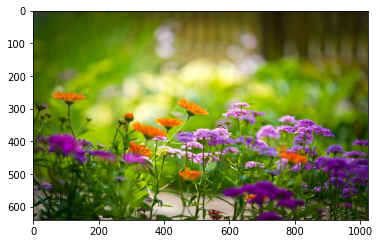

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)


# 1) Implement k-means clustering. Analyse the clusters formed for various values of k. Display the centroids of the clusters. DO NOT USE IN_BUILT ROUTINE for k-means clustering.

Now we have to prepare the data for K means. The image is a 3-dimensional shape but to apply k-means clustering on it we need to reshape it to a 2-dimensional array.

In [ ]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)
pixel_vals

array([[59., 77., 55.],
       [58., 76., 54.],
       [57., 75., 53.],
       ...,
       [40., 50., 16.],
       [37., 47., 13.],
       [35., 45., 11.]], dtype=float32)

Now we will implement the K means algorithm for segmenting an image.

Code:  Taking k = 3, which means that the algorithm will identify 3 clusters in the image.

In [ ]:
#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
criteria

(3, 100, 0.85)

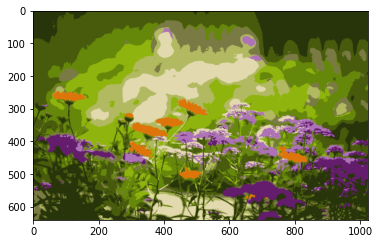

In [ ]:
# then perform k-means clustering wit h number of clusters defined as 3
#also random centres are initally chosed for k-means clustering
k = 10
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

plt.imshow(segmented_image)

# As you can see with an increase in the value of k, the image becomes clearer and distinct because the K-means algorithm can classify more classes/cluster of colors. K-means clustering works well when we have a small dataset. It can segment objects in images and also give better results. But when it is applied on large datasets (more number of images), it looks at all the samples in one iteration which leads to a lot of time being taken up.



# 2) Implement Dimensionality reduction using PCA. Analyse the reconstruction error for various values of k. Display the Eigen Vectors. DO NOT USE IN_BUILT ROUTINE for implementing PCA. However you can use in-built routines for computing Eigen vectors and Eigen values.


In [ ]:
from PIL import Image

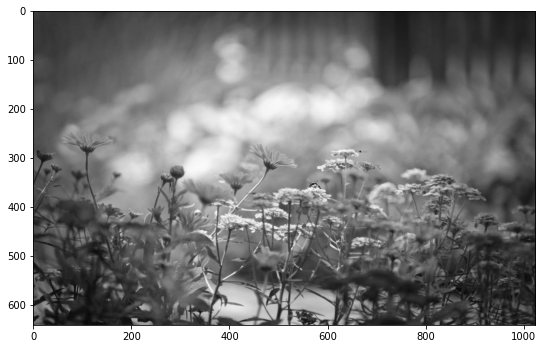

In [ ]:
img = Image.open('/content/gdrive/My Drive/Colab Notebooks/FLower.jpg')
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray);

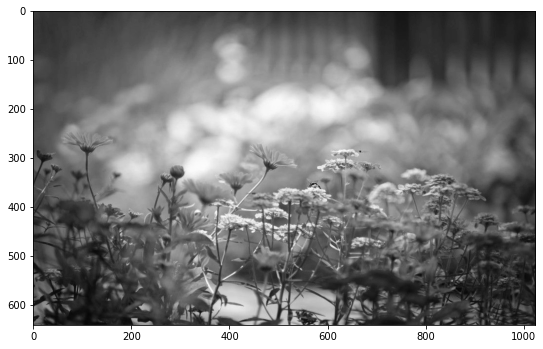

In [ ]:
# Now I'll convert the image data into a numpy matrix, plotting the result to show the data is unchanged.


imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');

In [ ]:
# Now to compute the singular value decomposition:

U, sigma, V = np.linalg.svd(imgmat)
U, sigma, V

(matrix([[-0.01811927, -0.00407199, -0.01957673, ..., -0.02990722,
          -0.01664546, -0.00996373],
         [-0.01775467, -0.00151985, -0.01994021, ...,  0.03891659,
           0.01593057,  0.035544  ],
         [-0.01776438, -0.00113792, -0.02001707, ..., -0.00237503,
          -0.00586044, -0.02494986],
         ...,
         [-0.02341802,  0.04684855,  0.03260873, ..., -0.00548077,
          -0.00085259, -0.00473939],
         [-0.02333369,  0.04686641,  0.0348381 , ...,  0.00143976,
           0.00085823,  0.00089168],
         [-0.02427094,  0.04472165,  0.04178315, ..., -0.00101417,
          -0.00093467,  0.00221136]]),
 array([9.66762646e+04, 1.15558836e+04, 7.58579389e+03, 6.60085721e+03,
        5.49901131e+03, 5.15186116e+03, 4.53570534e+03, 4.18414122e+03,
        3.95171947e+03, 3.80097044e+03, 3.59324962e+03, 3.45085824e+03,
        3.23769519e+03, 2.99163564e+03, 2.95846112e+03, 2.70946441e+03,
        2.66305994e+03, 2.59096178e+03, 2.49772807e+03, 2.38934838e+03,


Computing an approximation of the image using the first column of  U  and first row of  V  reproduces the most prominent feature of the image, the light area on top and the dark area on the bottom. The darkness of the arch causes the extra darkness in the middle of the reconstruction. Each column of pixels in this image is a different weighting of the same values,  u⃗ 1 :

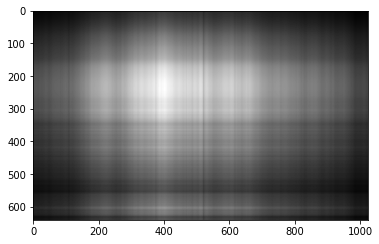

In [ ]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
plt.imshow(reconstimg, cmap='gray');

Even with just the second and third vectors, the shape of the arch begins to appear.



In [ ]:
from past.builtins import xrange


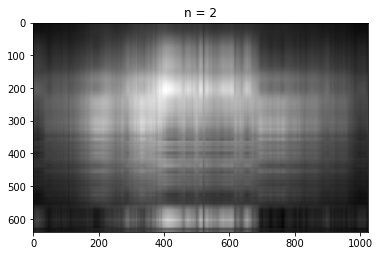

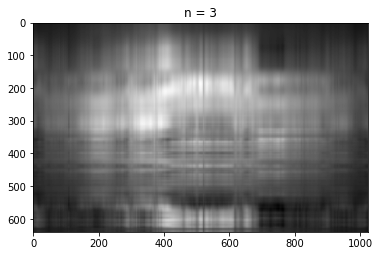

In [ ]:
for i in xrange(2, 4):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()


The loop below shows the reconstructed image using the first  n  vectors of the singular value decomposition ( n  is shown in the title of the plot). The first 50 vectors produce an image very close the original image, while taking up only  50∗3900+50+50∗26003900∗2600≈3.2%  as much space as the original data.

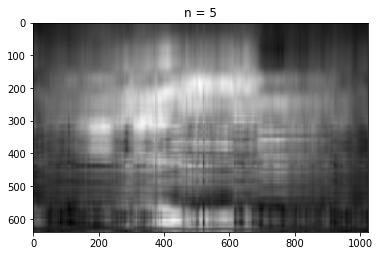

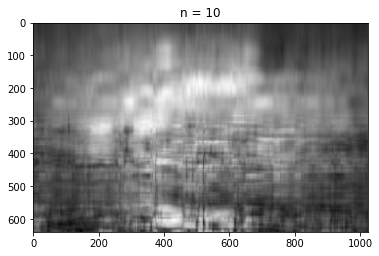

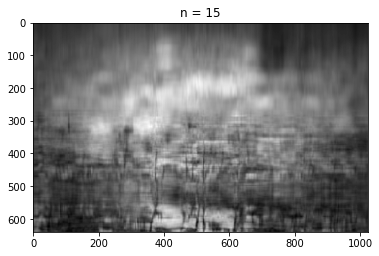

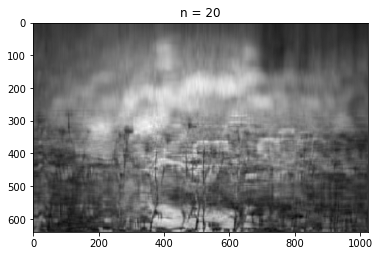

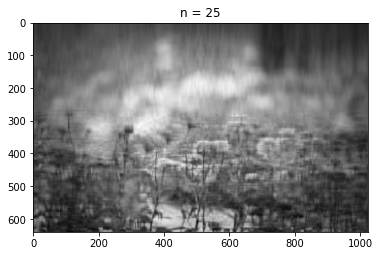

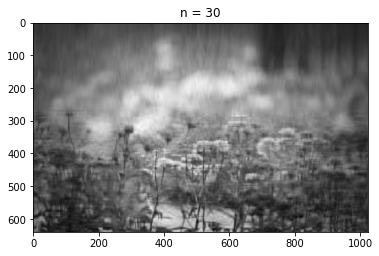

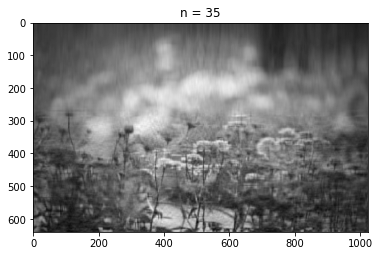

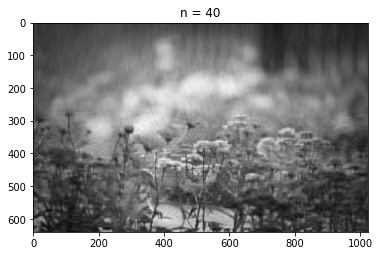

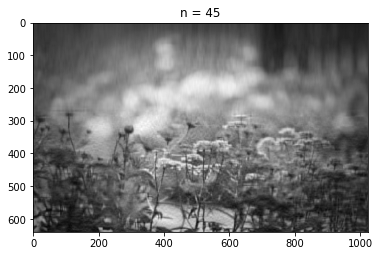

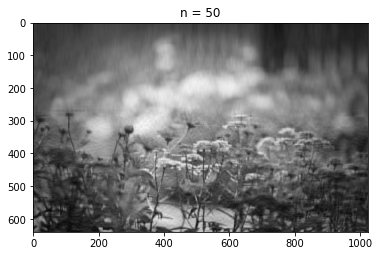

In [ ]:
for i in xrange(5, 51, 5):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()